# Another explanation about PCA

<img src = 'pca.jpeg' width="width" height="height"/>

In [1]:
#Import the libraries
import numpy as np
import pandas as pd
import math
import random
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

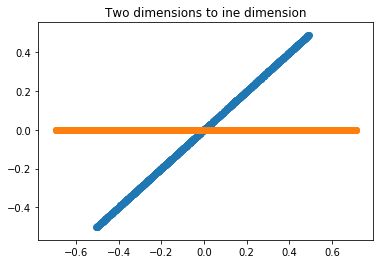

In [2]:
#Consider a base case with two completely correlated variables x and y
n = 1
#Define x and y
x = np.random.uniform(1, 2, 1000)
y = x.copy() * n

#Mean normalize the data
x -= np.mean(x)
y -= np.mean(y)

#Create a dataframe with two columns x and y
data = pd.DataFrame({'x': x, 'y': y})
#PLot a scatter plot
plt.scatter(data['x'], data['y'])

pca = PCA(n_components = 2)

#Create the transformation matrix of the data. It is the rotational matrix
pcaTransform = pca.fit(data)

#Transform the data on rotational matrix
rotatedData = pcaTransform.transform(data)

#Create the new dataframe with two variables
data_PCA = pd.DataFrame(data = rotatedData, columns = ['PCA1', 'PCA2'])

#Plot the new scatter plot
plt.scatter(data_PCA['PCA1'], data_PCA['PCA2'])
plt.title("Two dimensions to ine dimension")
plt.show()

# Understanding the transformation model PCATransform (Rotation and Transformed matrix)

In [3]:
print("Eigen vectors or Principle Components: ")
print(pcaTransform.components_)

print("Eigenvalues or variance: ")
print(pcaTransform.explained_variance_)

Eigen vectors or Principle Components: 
[[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]
Eigenvalues or variance: 
[1.61734377e-01 9.78533798e-34]


$cos(45^o) = 0.7071$

The rotation matrix is equal to:

$$R = \begin{bmatrix} cos(45^o) & sin(45^o) \\ -sin(45^o) & cos(45^o) \end{bmatrix}$$ 

And $45^o$ is the same angle that form the variables y = 1 * x.

Then, PCA has identified the angle in which point the original variables.

And the explained Variance is around [0.166 0]. Remember that the Variance of a uniform random variable x ~ U(1, 2), as our x and y, is equal to:

$$Var(x) = \frac {(2 - 1)^2}{12} = 0.083333$$
    
Then the explained variance given by the PCA can be interpret as

$$[Var(x) + Var(y)  \ 0] = [0.0833 + 0.0833 \  0] = [0.166 \ 0]$$

Which means that all the explained variance of our new system is explained by our first principal component. 


# Correlated Normal Random Variables (2 random variables with different variances)

Angle:  45.0
Rotation matrix:  [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


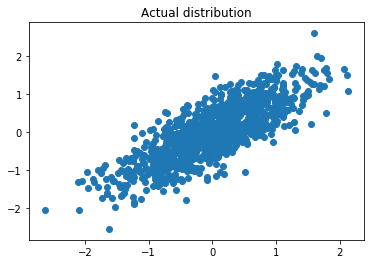

In [4]:
#Import libraries for plotting
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

random.seed(100)

#Define the standard devaitions
std1 = 1
std2 = 0.33

#Define the two samples
x = np.random.normal(0, std1, 1000)
y = np.random.normal(0, std2, 1000)

#Mean normalize the data
x -= np.mean(x)
y -= np.mean(y)

#Define a pair of dependent variables
n = 1
angle = np.arctan(1 / n)
print("Angle: ", angle * 180 / math.pi)

#Define the rotation matrix
rotationMatrix = np.array([[np.cos(angle), np.sin(angle)],
                          [np.cos(angle) * -1, np.sin(angle)]])

print("Rotation matrix: ", rotationMatrix)

#Create a covariance matrix
xy = np.concatenate(([x], [y]), axis = 0).T

#Transform the data using rotational matrix
data = np.dot(xy, rotationMatrix)

#Plot a scatterplot
plt.title("Actual distribution")
plt.scatter(data[:, 0], data[:, 1])
plt.show()

Eigen vectors:  [[-0.7033485  -0.71084519]
 [ 0.71084519 -0.7033485 ]]
Eigenvalues:  [0.98897793 0.10698481]
Rotated data:  [-1.07355609e-01 -9.56825564e-01 -4.99977741e-02 -2.14961135e-01
  7.83393016e-02 -1.56380956e+00 -9.02642239e-01 -3.92786685e-01
  4.32753029e-01  1.19533365e+00 -1.26281484e+00  3.00003733e-01
 -8.98838760e-01 -1.17580316e+00 -2.26007021e+00  1.23616929e+00
 -2.02136817e+00 -2.39090931e+00  1.69358868e-02 -6.22168616e-01
 -1.24556563e-01  3.33571532e-01  1.03910123e+00 -2.92345534e-01
  2.86397340e-02 -1.34891172e+00  1.51868942e-01  5.89672150e-01
 -3.25828464e-01 -4.63228193e-01  1.97894090e-01 -2.77597946e-01
  7.97612976e-01 -1.51612511e-01  7.58541883e-01  1.63033068e+00
  7.75932940e-02 -9.15197580e-01 -4.47735046e-01  6.50722209e-01
 -3.55528829e-01  1.03999069e+00  4.15200501e-01  3.01098451e-01
  2.16992778e-01  3.62791855e-01  5.70829039e-01 -9.43005649e-01
 -1.32018320e+00 -1.96327226e-01  1.08878748e+00 -3.25816314e-01
  2.01853736e+00 -1.35399929e+0

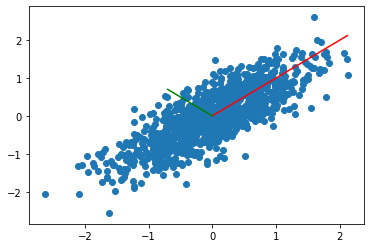

In [5]:
#Plot original and transformed system using PCA

#Plot original distribution
plt.scatter(data[:, 0], data[:, 1])

#Create PCA object with 2 dimensions
pca = PCA(n_components = 2)

#Create a transformation model for the data, it gives rotational matrix and explained variance
pcaTransform = pca.fit(data)

#Create the transformed data
dataPCA = pcaTransform.transform(data)

#Print the eigenvalues and eigenvectors
print("Eigen vectors: ", pcaTransform.components_)
print("Eigenvalues: ", pcaTransform.explained_variance_)

#Print the rotated data
print("Rotated data: ", dataPCA[:, 0], dataPCA[:, 1])

#Print the two components axes
plt.plot([0, rotationMatrix[0][0] * std1 * 3], [0, rotationMatrix[0][1] * std1 * 3], 'k-', color='red')
plt.plot([0, rotationMatrix[1][0] * std2 * 3], [0, rotationMatrix[1][1] * std2 * 3], 'k-', color='green')
plt.show()

# PCA as dimensionality reduction

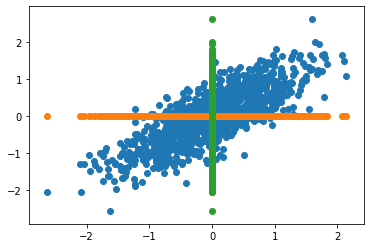

In [6]:
#Plot the original data and its top 2 dimensions
nPoints = len(data)

# Plot the original data in blue
plt.scatter(data[:,0], data[:,1])

#Plot the projection along the first component in orange
plt.scatter(data[:,0], np.zeros(nPoints))

#Plot the projection along the second component in green
plt.scatter(np.zeros(nPoints), data[:,1])

plt.show()